In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
#pd.option_context('mode.use_inf_as_na', True)

In [2]:
def api_runner():
    #global df
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'a68f50d9-a73e-4f24-b6ec-d931f808250c',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    #df = pd.concat([df, df2], ignore_index=True)

    if not os.path.isfile(r'D:\DA\Crypto.csv'):
        df.to_csv(r'D:\DA\Crypto.csv', header = 'column_names')
    else:
        df.to_csv(r'D:\DA\Crypto.csv', mode = 'a', header = False)

In [3]:
import os
from time import time
from time import sleep

for i in range(5):
    api_runner()
    print("API Runner completed successfully.")
    sleep(60)

API Runner completed successfully.
API Runner completed successfully.
API Runner completed successfully.
API Runner completed successfully.
API Runner completed successfully.


In [4]:
df2 = pd.read_csv(r'D:\DA\Crypto.csv')
df2

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10759,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19602531.00000,19602531.00000,False,NaN,1,NaN,NaN,NaN,2024-01-19T13:24:00.000Z,41347.22956,26628771430.33003,34.31160,0.07065,-2.43383,-9.83701,-4.37455,11.00870,39.01353,810510349297.62830,49.63000,868291820849.56995,NaN,2024-01-19T13:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-19 18:55:05.688259
1,1,1027,Ethereum,ETH,ethereum,8283,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120177064.74869,120177064.74869,True,NaN,2,NaN,NaN,NaN,2024-01-19T13:24:00.000Z,2490.27270,11507123891.98197,11.04170,0.28171,-0.57381,-6.84565,11.78780,22.87175,55.09006,299273663737.28900,18.32540,299273663737.28998,NaN,2024-01-19T13:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-19 18:55:05.688259
2,2,825,Tether USDt,USDT,tether,72138,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,95060023617.71117,98601637401.38152,True,NaN,3,NaN,NaN,NaN,2024-01-19T13:23:00.000Z,0.99895,46210139081.25372,16.86260,-0.00737,-0.03523,-0.11038,-0.10945,-0.16185,-0.13677,94959983731.50365,5.81470,98497870368.62000,NaN,2024-01-19T13:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-19 18:55:05.688259
3,3,1839,BNB,BNB,bnb,2023,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,149548994.65924,149548994.65924,False,NaN,4,NaN,NaN,NaN,2024-01-19T13:23:00.000Z,314.30909,1091924164.43946,6.92600,0.17084,0.92545,0.82569,21.48937,27.08267,47.83918,47004608441.29073,2.87820,47004608441.29000,NaN,2024-01-19T13:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-19 18:55:05.688259
4,4,5426,Solana,SOL,solana,616,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,432790804.19146,567391372.85261,True,NaN,5,NaN,NaN,NaN,2024-01-19T13:24:00.000Z,94.26391,2392704046.76252,-13.10830,-0.11499,-3.97566,-4.01789,20.70483,55.91228,226.57837,40796553843.87682,2.49810,53484529867.44000,NaN,2024-01-19T13:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-19 18:55:05.688259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,10,1958,TRON,TRX,tron,905,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,88205460457.21062,88205529904.73148,True,NaN,11,71659659264.00000,7842829391.37879,NaN,2024-01-19T13:27:00.000Z,0.10945,280950722.31877,28.98470,0.29941,0.71736,1.52648,6.68243,4.52692,20.52033,9653693373.07810,0.59000,9653700973.80000,NaN,2024-01-19T13:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-19 18:59:11.271174
71,11,1975,Chainlink,LINK,chainlink,1576,2017-09-20T00:00:00.000Z,"['platform', 'defi', 'oracles', 'smart-contrac...",1000000000.00000,568099970.45279,1000000000.00000,False,NaN,12,NaN,NaN,NaN,2024-01-19T13:27:00.000Z,15.53417,710721420.85278,17.47160,0.74528,2.93244,2.72152,6.37298,2.99874,91.74095,8824959346.02094,0.53940,15534166176.75000,NaN,2024-01-19T13:27:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2024-01-19 18:59:11.271174
72,12,6636,Polkadot,DOT,polkadot-new,666,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1269141239.81894,1401401741.52729,True,NaN,13,NaN,NaN,NaN

In [5]:
df3 = df2.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d',  'quote.USD.percent_change_60d',  'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.13657,-2.38304,-9.85037,-4.45694,11.07501,39.06128
Ethereum,0.31401,-0.58509,-7.02374,11.63371,22.94852,55.01825
Tether USDt,0.01180,0.00250,-0.08952,-0.07100,-0.14237,-0.12139
BNB,0.25017,0.91067,0.85498,21.60072,27.12011,47.93342
Solana,0.15328,-3.77365,-4.02506,20.94906,56.23942,227.11596
XRP,0.08903,-1.66628,-8.17847,-11.14314,-11.87295,6.52337
USDC,0.00459,0.00587,0.01697,0.02388,0.01992,0.01753
Cardano,-0.02376,-2.54233,-14.18655,-16.26558,27.52078,94.47228
Avalanche,0.14833,-3.99601,-12.69584,-21.81628,53.37206,252.95662


In [6]:
df4 = df3.stack()
df4

name                                 
Bitcoin  quote.USD.percent_change_1h      0.13657
         quote.USD.percent_change_24h    -2.38304
         quote.USD.percent_change_7d     -9.85037
         quote.USD.percent_change_30d    -4.45694
         quote.USD.percent_change_60d    11.07501
                                           ...   
Polygon  quote.USD.percent_change_24h    -0.97610
         quote.USD.percent_change_7d    -14.86380
         quote.USD.percent_change_30d     0.39849
         quote.USD.percent_change_60d    -7.04306
         quote.USD.percent_change_90d    42.39258
Length: 90, dtype: float64

In [7]:
df5 = df4.to_frame(name='values')
df5

values
name                                          
Bitcoin quote.USD.percent_change_1h    0.13657
        quote.USD.percent_change_24h  -2.38304
        quote.USD.percent_change_7d   -9.85037
        quote.USD.percent_change_30d  -4.45694
        quote.USD.percent_change_60d  11.07501
...                                        ...
Polygon quote.USD.percent_change_24h  -0.97610
        quote.USD.percent_change_7d  -14.86380
        quote.USD.percent_change_30d   0.39849
        quote.USD.percent_change_60d  -7.04306
        quote.USD.percent_change_90d  42.39258

[90 rows x 1 columns]

In [8]:
#index = pd.Index(range(df5.count()))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.13657
1,Bitcoin,quote.USD.percent_change_24h,-2.38304
2,Bitcoin,quote.USD.percent_change_7d,-9.85037
3,Bitcoin,quote.USD.percent_change_30d,-4.45694
4,Bitcoin,quote.USD.percent_change_60d,11.07501
...,...,...,...
85,Polygon,quote.USD.percent_change_24h,-0.97610
86,Polygon,quote.USD.percent_change_7d,-14.86380
87,Polygon,quote.USD.percent_change_30d,0.39849
88,Polygon,quote.USD.percent_change_60d,-7.04306


In [9]:
df7 = df6.rename(columns = {"level_1":"percent_change"})
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.13657
1,Bitcoin,24h,-2.38304
2,Bitcoin,7d,-9.85037
3,Bitcoin,30d,-4.45694
4,Bitcoin,60d,11.07501
...,...,...,...
85,Polygon,24h,-0.97610
86,Polygon,7d,-14.86380
87,Polygon,30d,0.39849
88,Polygon,60d,-7.04306


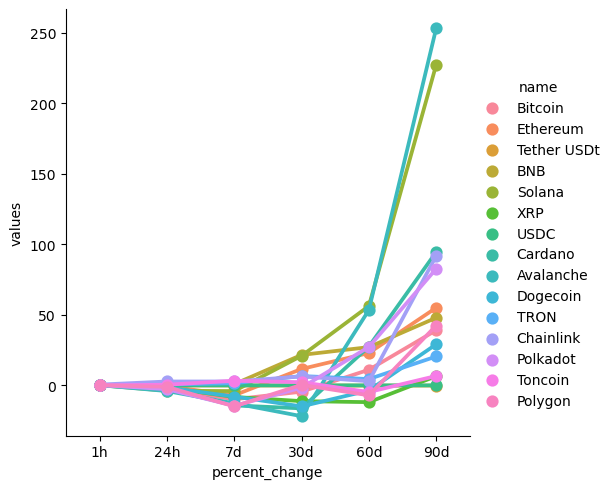

In [10]:
# Data Visualization starts here
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [11]:
df8 = df2[['name', 'quote.USD.price', 'timestamp']]
df8 = df8.query("name == 'Solana'")
df8

,name,quote.USD.price,timestamp
4,Solana,94.26391,2024-01-19 18:55:05.688259
19,Solana,94.48790,2024-01-19 18:56:07.005841
34,Solana,94.48780,2024-01-19 18:57:08.398314
49,Solana,94.49720,2024-01-19 18:58:10.070007
64,Solana,94.48554,2024-01-19 18:59:11.271174


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

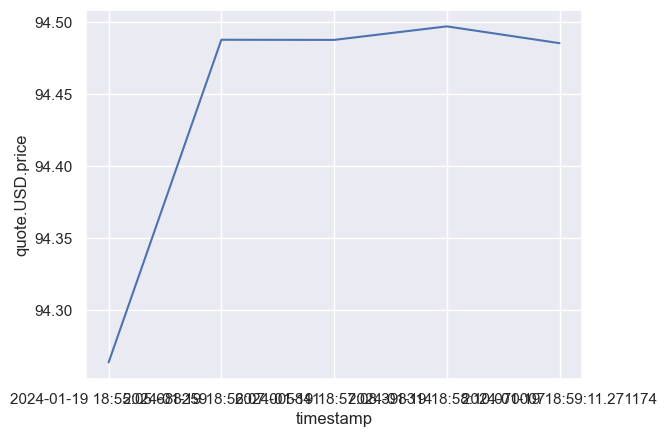

In [12]:
sns.set_theme(style='darkgrid')

sns.lineplot(x='timestamp', y='quote.USD.price', data=df8)